# 🌠 Práctica 04: La poderosa $A^{∗}$ 🌟

----

<b>Team:</b> <font color='red'>S</font><b>ocios</b> <font color='blue'>I</font><b>nteligentemente</b> <font color='green'>A</font><b>rtificiales</b> (<font color='red'>S</font>.<font color='blue'>I</font>.<font color='green'>A</font>)


<font color='red'>✪</font> Bonilla Reyes Dafne

<font color='red'>✪</font> Castañón Maldonado Carlos Emilio

<font color='red'>✪</font> Mares Cruz Tlacaelel Horacio

<font color='red'>✪</font> Navarro Santana Pablo César



----

<div style="text-align: center"> 

[![](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExendwNm0xdzcxZnV2Ym56cXRlOXlldDdyOTRwMmpmNnlsam0zMXdtaCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/DdmrOg4Z4tndBRAtM3/giphy-downsized.gif)](https://www.youtube.com/watch?v=YRvOePz2OqQ)

</div>


### 📌 **Definimos la Clase Agente**

<div style="text-align: justify"> 

El agente tiene que explorar el laberinto y encontrar la salida. Al crearlo, solo le damos su posición inicial en el laberinto, como si estuviera parado en la entrada, mirando hacia adentro, preguntándose qué le depara el destino.

Tiene que moverse pero no puede simplemente moverse como sea debe evitar obstáculos. Le decimos en qué dirección ir ("arriba", "abajo", "izquierda", "derecha"), y él verifica si el camino está libre. Si encuentra un muro (un obstáculo representado por un 1), sabe que debe detenerse y pensar en otro camino.

</div>

In [2]:
class Agente:
    def __init__(self, posicion):
        """
        Inicializa un objeto Agente con una posición dada.

        Args:
            posicion (list): La posición inicial del agente en forma de lista [x, y].
        """
        self.posicion = posicion

    def mover(self, direccion, laberinto):
        """
        Mueve el agente en la dirección especificada si es un movimiento válido.

        Args:
            direccion (str): La dirección en la que se desea mover el agente ("arriba", "abajo", "izquierda", "derecha").
            laberinto (list): El laberinto en forma de matriz.

        Returns:
            list or None: La nueva posición del agente si el movimiento es válido, None en caso contrario.
        """
        x, y = self.posicion
        # Mueve el agente arriba si no es límite superior, y donde la celda destino no es un obstáculo.
        if direccion == "arriba" and x > 0 and laberinto[x-1][y] != 1:
            self.posicion = [x-1, y]
        # Mueve el agente abajo si no es límite inferior, y donde la celda destino no es un obstáculo.
        elif direccion == "abajo" and x < len(laberinto) - 1 and laberinto[x+1][y] != 1:
            self.posicion = [x+1, y]
        # Mueve el agente izquierda si no es límite izquierdo, y donde la celda destino no es un obstáculo.
        elif direccion == "izquierda" and y > 0 and laberinto[x][y-1] != 1:
            self.posicion = [x, y-1]
        # Mueve el agente derecha si no es límite derecho, y donde la celda destino no es un obstáculo. 
        elif direccion == "derecha" and y < len(laberinto[0]) - 1 and laberinto[x][y+1] != 1:
            self.posicion = [x, y+1]
        else:
            return None
        
        return self.posicion

#### ➡️ **Flechas**

<div style="text-align: justify"> 

Mientras nuestro agente explora, vamos a dejar un rastro de su viaje. Para eso utilizamos la función flechas. Cada vez que el Agente toma una decisión sobre hacia dónde moverse, convertimos esa dirección en una flecha visual ("↑", "↓", "←", "→").

</div>

In [3]:
'''
Funcion que recibe una dirección y retorna la flecha correspondiente a la dirección.
'''
def flechas(direccion):
    """
    Devuelve una flecha correspondiente a la dirección dada.

    Parámetros:
    direccion (str): La dirección de la flecha. Puede ser "arriba", "abajo", "izquierda" o "derecha".

    Retorna:
    str: La flecha correspondiente a la dirección dada.
    """
    if direccion == "arriba":
        return  "↑"
    elif direccion == "abajo":
        return  "↓"
    elif direccion == "izquierda":
        return  "←"
    elif direccion == "derecha":
        return  "→"

### 📌 **Backtracking**

<div style="text-align: justify"> 

Funcion en la que definimos el backtracking que usará el agente para encontrar (o no) la salida del laberinto. Esta funcion regresa solo la solucion final, es decir, el camino que el agente debe seguir para llegar a la salida del laberinto y
por ende no regresa todos los posibles caminos usados por el agente.

Iniciamos marcando el comienzo de la exploración con el registro del primer movimiento. Para evitar recorrer los mismos caminos, empleamos un conjunto de visitados, y evaluamos cada movimiento en función de su viabilidad y su capacidad para acercarnos a la meta. Al hacer esto el agente encuentra la salida y aprende de cada paso.

</div>

In [4]:

"""
    Realiza una búsqueda en profundidad (backtracking) para encontrar la salida en un laberinto.

    Parámetros:
    - agente (agente): El agente que se mueve por el laberinto.
    - laberinto (list): El laberinto representado como una matriz.
    - visitados (set): Conjunto de celdas visitadas. Por defecto, es None.
    - instrucciones (list): Lista de instrucciones para llegar a la salida. Por defecto, es una lista vacía.

    Retorna:
    - bool: True si se encuentra la salida, False si no se encuentra.

"""
def backtrack(agente, laberinto, visitados = None, instrucciones = []):
    if not instrucciones :
        instrucciones.append(f"Primer movimiento!\t Posición: [{agente.posicion[0]}, {agente.posicion[1]}]")
    if visitados is None:
        visitados = set()

    x, y = agente.posicion

    if laberinto[x][y] == "S":  # Si el agente encuentra la salida, imprime el camino y retorna True
        for i in instrucciones:
            print(i)
        print("Encontré la salida :D\n")
        return True
    else:
        visitados.add((x, y))  # Marcar la celda actual como visitada
        movimientos = ["arriba", "abajo", "izquierda", "derecha"]

        for movimiento in movimientos:
            agente_temp = Agente(agente.posicion[:])  # Crear una copia del agente para simular movimientos
            nueva_posicion = agente_temp.mover(movimiento, laberinto)

            if nueva_posicion and tuple(nueva_posicion) not in visitados:  # Verificar si el movimiento es válido y Si la nueva posición no ha sido visitada

                instrucciones.append(f"Movimiento: {movimiento}\t Posición: {nueva_posicion}")
                if backtrack(Agente(nueva_posicion), laberinto, visitados):
                    laberinto[agente.posicion[0]][agente.posicion[1]] = flechas(movimiento)
                    return True
                else:
                    laberinto[agente.posicion[0]][agente.posicion[1]] = 0
                    instrucciones.pop()
                    
        return False

**En caso de no querer usar el entorno virtual ejecutar los siguientes comandos:**

In [5]:
#pip install matplotlib
#pip install networkx
#pip install seaborn

**Mandamos a llamar a las librerias que usamos para la practica:**

In [6]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
import networkx as nx
from IPython import display
from IPython.display import HTML
import numpy as np

In [7]:
# Funcion auxiliar para localizar la primera "S" que se encuentre en un laberinto
# Esta es usada en las funciones de DFS y BFS.
def doxeaLaS(laberinto):
    for i in range(len(laberinto)):
        for j in range(len(laberinto[0])):
            if laberinto[i][j] == "S":
                return (i,j)


In [8]:

# Funcion que en base a un laberinto matricial, dibuja a este ultimo como una grafica.
def dibujar_grafo_laberinto(laberinto):
    G = nx.Graph()

    filas = len(laberinto)
    columnas = len(laberinto[0])

    # Crear nodos
    for fila in range(filas):
        for columna in range(columnas):
            # Agregar nodo con su posición como atributo
            G.add_node((fila, columna))

    # Crear aristas
    for fila in range(filas):
        for columna in range(columnas):
            # Verificar si la celda actual es un pasillo (0 o "E" o "S")
            if laberinto[fila][columna] == 0 or laberinto[fila][columna] == "E" or laberinto[fila][columna] == "S":
                # Agregar aristas a las celdas vecinas que también son pasillos
                if fila > 0 and laberinto[fila - 1][columna] == 0:
                    G.add_edge((fila, columna), (fila - 1, columna))
                if fila < filas - 1 and laberinto[fila + 1][columna] == 0:
                    G.add_edge((fila, columna), (fila + 1, columna))
                if columna > 0 and laberinto[fila][columna - 1] == 0:
                    G.add_edge((fila, columna), (fila, columna - 1))
                if columna < columnas - 1 and laberinto[fila][columna + 1] == 0:
                    G.add_edge((fila, columna), (fila, columna + 1))

    # Dibujar el grafo
    pos = {(fila, columna): (columna, -fila) for fila in range(filas) for columna in range(columnas)}
    #print(pos)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='cyan', font_size=8, font_weight='bold')
    plt.show()


### **$A^{*}$**

In [9]:
xAGENTE = 0
yAGENTE = 0

laberinto = [[]]


def obtener_ruta_de_x_a_y(inicio, fin, camino):
    ruta = [fin]
    while ruta[-1] != inicio:
        try:
            ruta.append(camino[ruta[-1]])
        except KeyError:
            break
    return ruta[::-1]

    
def laPoderosa_A(laberinto, agente):
    G = nx.Graph()

    # Vertice Inicial (E)
    laposicionxAGENTE = agente.posicion[0]
    laposicionyAGENTE = agente.posicion[1]

    inicio = (laposicionxAGENTE, laposicionyAGENTE)

    # Vertice Final (S)
    fin = doxeaLaS(laberinto)

    filas = len(laberinto)
    columnas = len(laberinto[0])

    # Crear nodos
    for fila in range(filas):
        for columna in range(columnas):
            if laberinto[fila][columna] == "E":
                inicio = (fila, columna)  # Establecer el vértice inicial
            elif laberinto[fila][columna] == "S":
                fin = (fila, columna)  # Establecer el vértice final
            # Agregar nodo con su posición como atributo
            G.add_node((fila, columna))

    # Crear aristas
    for fila in range(filas):
        for columna in range(columnas):
            # Verificar si la celda actual es un pasillo (0 o "E" o "S")
            if laberinto[fila][columna] == 0 or laberinto[fila][columna] == "E" or laberinto[fila][columna] == "S":
                # Agregar aristas a las celdas vecinas que también son pasillos
                if fila > 0 and laberinto[fila - 1][columna] == 0:
                    G.add_edge((fila, columna), (fila - 1, columna))
                if fila < filas - 1 and laberinto[fila + 1][columna] == 0:
                    G.add_edge((fila, columna), (fila + 1, columna))
                if columna > 0 and laberinto[fila][columna - 1] == 0:
                    G.add_edge((fila, columna), (fila, columna - 1))
                if columna < columnas - 1 and laberinto[fila][columna + 1] == 0:
                    G.add_edge((fila, columna), (fila, columna + 1))
    ###################################################################################
    # Algoritmo A* 
                    
    # Diccionario para guardar el camino recorrido
    camino = {}

    # Diccionario para guardar el costo acumulado
    costo_acumulado = {}

    # Diccionario para guardar el costo total
    costo_total = {}

    # Lista de los nodos por visitar (inicialmente vacía)
    por_visitar = []

    # Inicializamos el diccionario de camino
    for nodo in G.nodes():
        camino[nodo] = None
    
    # Inicializamos el diccionario de costo acumulado
    for nodo in G.nodes():
        costo_acumulado[nodo] = float('inf')
    
    # Inicializamos el diccionario de costo total
    for nodo in G.nodes():
        costo_total[nodo] = float('inf')
    
    # Agregar el nodo inicial a la lista de nodos por visitar
    por_visitar.append(inicio)

    # El costo acumulado del nodo inicial lo iniciamos en 0
    costo_acumulado[inicio] = 0

    # Definimos la distancia Manhattan
    costo_total[inicio] = abs(fin[0] - inicio[0]) + abs(fin[1] - inicio[1])

    # Mientras la lista de nodos por visitar no este vacia
    while por_visitar:
        # Seleccionamos el nodo con el menor costo total
        nodo_actual = por_visitar[0]

        # Buscamos el nodo con el menor costo total
        for nodo in por_visitar:
            if costo_total[nodo] < costo_total[nodo_actual]:
                nodo_actual = nodo

        # Si el nodo seleccionado es el nodo final entonces terminamos >:D 
        if nodo_actual == fin:
            break

        # Eliminamos el nodo seleccionado de la lista de nodos por visitar
        por_visitar.remove(nodo_actual)

        # Para cada vecino del nodo seleccionado
        for vecino in G.neighbors(nodo_actual):
            # Calculamos el nuevo costo acumulado
            nuevo_costo_acumulado = costo_acumulado[nodo_actual] + 1

            # Si el nuevo costo acumulado es menor al costo acumulado del vecino
            if nuevo_costo_acumulado < costo_acumulado[vecino]:

                # Actualizamos el costo acumulado del vecino
                costo_acumulado[vecino] = nuevo_costo_acumulado

                # Actualizamos el costo total del vecino
                costo_total[vecino] = nuevo_costo_acumulado + abs(fin[0] - vecino[0]) + abs(fin[1] - vecino[1])

                # Agregamos el vecino a la lista de nodos por visitar
                por_visitar.append(vecino)

                # Actualizamos el nodo padre del vecino
                camino[vecino] = nodo_actual

    # primera propuesta 
    #else:
        
     #   print("No se pudo encontrar algunasolucion")

    
    ###################################################################################
    

    

    # Construimos la nueva gráfica con los nodos y aristas alcanzables por A*
    G_aEstrella = nx.Graph()
    for nodo, padre in camino.items():
        if padre is not None:
            G_aEstrella.add_edge(nodo, padre)


    # Dibujamos la grafica resultante de A*
    pos = {(fila, columna): (columna, -fila) for fila in range(filas) for columna in range(columnas)}
    # node_shapes = ["E" if nodo == inicioVertice else "S" if nodo == finVertice else "0" for nodo in G_aEstrella.nodes()]
    nx.draw(G_aEstrella, pos, with_labels=True, node_size=700, node_color='cyan', font_size=8, font_weight='bold') # node_shape=node_shapes
    plt.show()

    # Dibujamos el camino de la solución
    pos = {(fila, columna): (columna, -fila) for fila in range(filas) for columna in range(columnas)}

    caminitoA_Estrellita = obtener_ruta_de_x_a_y(inicio, fin, camino)
    
    nx.draw(G_aEstrella, pos, with_labels=True, node_size=700, node_color='cyan', font_size=8, font_weight='bold')
    nx.draw_networkx_nodes(G_aEstrella, pos, nodelist=caminitoA_Estrellita, node_color='red', node_size=700)
    nx.draw_networkx_edges(G_aEstrella, pos, edgelist=[(caminitoA_Estrellita[i], caminitoA_Estrellita[i+1]) for i in range(len(caminitoA_Estrellita)-1)], edge_color='red', width=2)
    plt.show()

### 📌 **Laberinto**
Aquí definimos el laberinto que usaremos para nuestro algoritmo.

In [10]:
# Representación del laberinto
laberinto = [
    ["E",  0,  0,    0,    0  ],
    [ 1,   0,  1,    1,    0  ],
    [ 0,   0,  0,    0,    0  ],
    [ 0,   1,  0,    1,    0  ],
    [ 0,   0,  0,    1,   "S" ]
]

laberintoBacktrack = [
    ["E",  0,  0,    0,    0  ],
    [ 1,   0,  1,    1,    0  ],
    [ 0,   0,  0,    0,    0  ],
    [ 0,   1,  0,    1,    0  ],
    [ 0,   0,  0,    1,   "S" ]
]

laberintoA_Estrella = [
    ["E",  0,  0,    0,    0  ],
    [ 1,   0,  1,    1,    0  ],
    [ 0,   0,  0,    0,    0  ],
    [ 0,   1,  0,    1,    0  ],
    [ 0,   0,  0,    1,   "S" ]
]



#### 📌 **El Agente**
Creamos una instancia del agente en la entrada del laberinto (que es la (0,0), pero puede cambiar)

In [11]:
xAGENTE = 0
yAGENTE = 0

In [12]:
agenteP = Agente([xAGENTE,yAGENTE])

#### 📌 **Graficamos la grafica donde va a operar $A^{*}$**

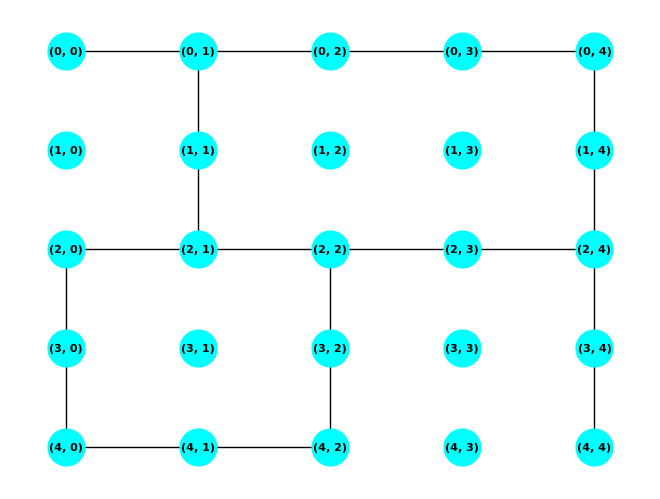

In [13]:
graficaLaberintoA = dibujar_grafo_laberinto(laberintoA_Estrella)

### 📌 **Ejecutamos $A^{*}$**

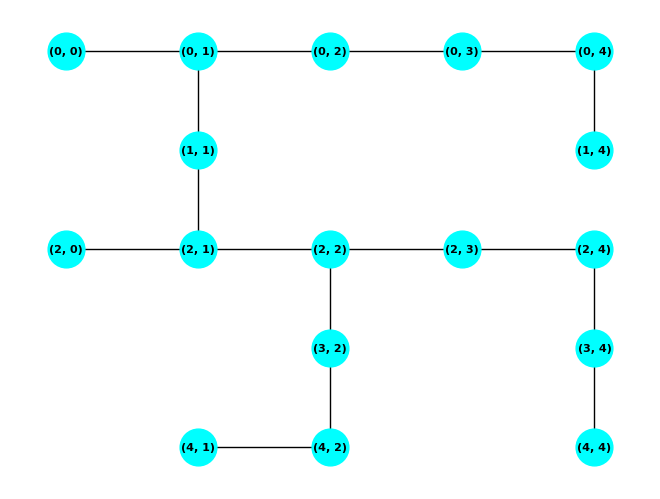

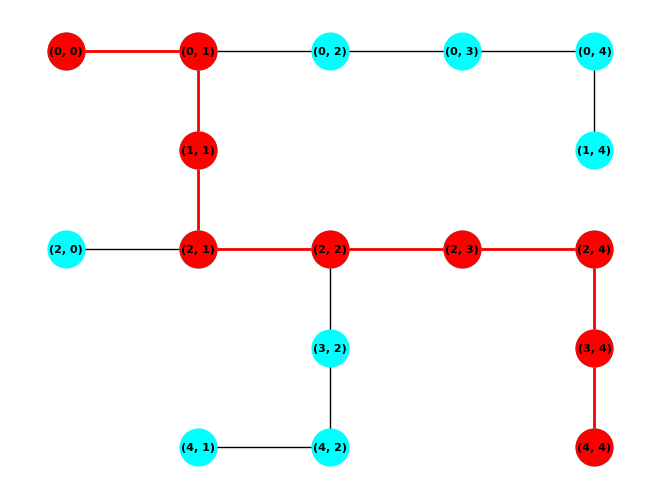

In [14]:
ejecucionLaberintoA = laPoderosa_A(laberintoA_Estrella, agenteP)

### 👾 **Gif de la ejecucion anterior de $A^{*}$**

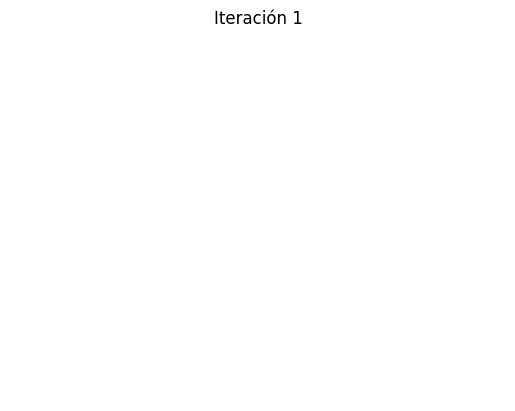

In [22]:
def crear_Grafica(camino):
    # Construir el grafo actual
    G_aEstrella = nx.Graph()
    for nodo, padre in camino.items():
        if padre is not None:
            G_aEstrella.add_edge(nodo, padre)
    return G_aEstrella

def laPoderosa_A_Animation(laberinto, agente):
    G = nx.Graph()

    # Vertice Inicial (E)
    laposicionxAGENTE = agente.posicion[0]
    laposicionyAGENTE = agente.posicion[1]

    inicio = (laposicionxAGENTE, laposicionyAGENTE)

    # Vertice Final (S)
    fin = doxeaLaS(laberinto)

    filas = len(laberinto)
    columnas = len(laberinto[0])

    # Crear nodos
    for fila in range(filas):
        for columna in range(columnas):
            if laberinto[fila][columna] == "E":
                inicio = (fila, columna)  # Establecer el vértice inicial
            elif laberinto[fila][columna] == "S":
                fin = (fila, columna)  # Establecer el vértice final
            # Agregar nodo con su posición como atributo
            G.add_node((fila, columna))

    # Crear aristas
    for fila in range(filas):
        for columna in range(columnas):
            # Verificar si la celda actual es un pasillo (0 o "E" o "S")
            if laberinto[fila][columna] == 0 or laberinto[fila][columna] == "E" or laberinto[fila][columna] == "S":
                # Agregar aristas a las celdas vecinas que también son pasillos
                if fila > 0 and laberinto[fila - 1][columna] == 0:
                    G.add_edge((fila, columna), (fila - 1, columna))
                if fila < filas - 1 and laberinto[fila + 1][columna] == 0:
                    G.add_edge((fila, columna), (fila + 1, columna))
                if columna > 0 and laberinto[fila][columna - 1] == 0:
                    G.add_edge((fila, columna), (fila, columna - 1))
                if columna < columnas - 1 and laberinto[fila][columna + 1] == 0:
                    G.add_edge((fila, columna), (fila, columna + 1))
    ###################################################################################
    # Algoritmo A* 
                    
    # Diccionario para guardar el camino recorrido
    camino = {}

    # Diccionario para guardar el costo acumulado
    costo_acumulado = {}

    # Diccionario para guardar el costo total
    costo_total = {}

    # Lista de los nodos por visitar (inicialmente vacía)
    por_visitar = []

    # Lista para almacenar los grafos en cada iteración
    grafos = []

    # Inicializamos el diccionario de camino
    for nodo in G.nodes():
        camino[nodo] = None
    
    # Inicializamos el diccionario de costo acumulado
    for nodo in G.nodes():
        costo_acumulado[nodo] = float('inf')
    
    # Inicializamos el diccionario de costo total
    for nodo in G.nodes():
        costo_total[nodo] = float('inf')
    
    # Agregar el nodo inicial a la lista de nodos por visitar
    por_visitar.append(inicio)

    # El costo acumulado del nodo inicial lo iniciamos en 0
    costo_acumulado[inicio] = 0

    # Definimos la distancia Manhattan
    costo_total[inicio] = abs(fin[0] - inicio[0]) + abs(fin[1] - inicio[1])

    # Mientras la lista de nodos por visitar no este vacia
    while por_visitar:
        # Seleccionamos el nodo con el menor costo total
        nodo_actual = por_visitar[0]

        # Buscamos el nodo con el menor costo total
        for nodo in por_visitar:
            if costo_total[nodo] < costo_total[nodo_actual]:
                nodo_actual = nodo

        # Si el nodo seleccionado es el nodo final entonces terminamos >:D 
        if nodo_actual == fin:
            break

        # Eliminamos el nodo seleccionado de la lista de nodos por visitar
        por_visitar.remove(nodo_actual)

        # Para cada vecino del nodo seleccionado
        for vecino in G.neighbors(nodo_actual):
            # Calculamos el nuevo costo acumulado
            nuevo_costo_acumulado = costo_acumulado[nodo_actual] + 1

            # Si el nuevo costo acumulado es menor al costo acumulado del vecino
            if nuevo_costo_acumulado < costo_acumulado[vecino]:

                # Actualizamos el costo acumulado del vecino
                costo_acumulado[vecino] = nuevo_costo_acumulado

                # Actualizamos el costo total del vecino
                costo_total[vecino] = nuevo_costo_acumulado + abs(fin[0] - vecino[0]) + abs(fin[1] - vecino[1])

                # Agregamos el vecino a la lista de nodos por visitar
                por_visitar.append(vecino)

                # Agregamos la grafica actual al gif de la representación de A*
                grafos.append(crear_Grafica(camino))

                # Actualizamos el nodo padre del vecino
                camino[vecino] = nodo_actual

    # primera propuesta 
    #else:
        
    #   print("No se pudo encontrar algunasolucion")
    ###################################################################################
                
    # Agregamos la ultima grafica al gif de la representación de A*
    grafos.append(crear_Grafica(camino))
                    
    # Construimos la nueva gráfica con los nodos y aristas alcanzables por A*
    #G_aEstrella = crear_Grafica(camino)
    caminitoA_Estrellita = obtener_ruta_de_x_a_y(inicio, fin, camino)

    return grafos, caminitoA_Estrellita


def update(frame):
    ax.clear()
    nx.draw(grafos[frame], pos, with_labels=True, node_size=700, node_color='cyan', font_size=8, font_weight='bold')
    plt.title(f'Iteración {frame+1}')



# Generar grafos y posición de nodos
grafos, ruta_mas_corta = laPoderosa_A_Animation(laberintoA_Estrella, agenteP)
pos = {(fila, columna): (columna, -fila) for fila in range(len(laberintoA_Estrella)) for columna in range(len(laberintoA_Estrella[0]))}

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(grafos), interval=1000, repeat=True)

# Configurar el formato de renderizado predeterminado como HTML5
plt.rcParams['animation.html'] = 'html5'

# Visualizar la animación en el notebook
HTML(ani.to_jshtml())



### 📌 **Generador Aleatorio de Laberintos**

Modificar los parametros de filas y columnas para generar laberintos de diferentes tamaños.

In [23]:
# Dimensiones del laberinto
filas = 8
columnas = 8

In [37]:
import random
import copy 

# Crear el laberinto con todos los valores aleatorios
laberintoA = [[random.choice([0,1]) for _ in range(columnas)] for _ in range(filas)]

# Elegir una posición aleatoria para la entrada (E) y la salida (S)
entrada_fila, entrada_columna = random.randint(0, filas - 1), random.randint(0, columnas - 1)
salida_fila, salida_columna = random.randint(0, filas - 1), random.randint(0, columnas - 1)

# Asegurarse que la entrada y la salida no estén en la misma posición
while entrada_fila == salida_fila and entrada_columna == salida_columna:
    salida_fila, salida_columna = random.randint(0, filas - 1), random.randint(0, columnas - 1)

# Establecer la entrada (E) y la salida (S)
laberintoA[entrada_fila][entrada_columna] = 'E'
laberintoA[salida_fila][salida_columna] = 'S'

laberintoCopia = copy.deepcopy(laberintoA)

# Imprimir el laberinto
for fila in laberintoA:
    print(fila)

[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1]
[0, 0, 0, 1, 0, 0, 1, 0]
[0, 1, 0, 'S', 0, 1, 0, 0]
[0, 'E', 0, 1, 1, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
[1, 0, 1, 0, 1, 1, 0, 1]


In [38]:
# laberintoA[entrada_fila][entrada_columna] = 'E'
agenteA = Agente( [entrada_fila, entrada_columna] )

En caso de que al ejecutar no se muestren los pasos, es un alto indicativo de que no existe solucion para el laberinto generado.

In [39]:
algoritmoBRUTALISIMO = backtrack(agenteA, laberintoA)

#if not algoritmoBRUTALISIMO:
 #   print("Nose encontro solucion alguna.")
#lse:
#    try:
#        laPoderosa_A(laberinto, agenteP)
#    except:
#        print("No se encontro solucion alguna.")

Primer movimiento!	 Posición: [1, 5]
Movimiento: abajo	 Posición: [5, 1]
Movimiento: abajo	 Posición: [6, 1]
Movimiento: derecha	 Posición: [6, 2]
Movimiento: arriba	 Posición: [5, 2]
Movimiento: arriba	 Posición: [4, 2]
Movimiento: arriba	 Posición: [3, 2]
Movimiento: derecha	 Posición: [3, 3]
Encontré la salida :D



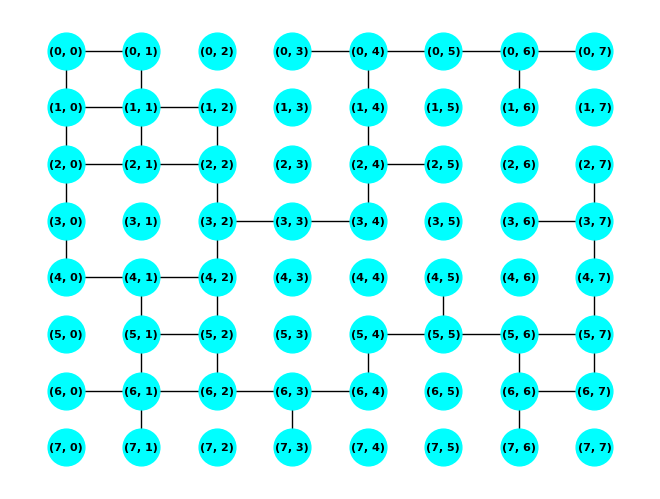

In [40]:
laberintoRandomA = dibujar_grafo_laberinto(laberintoCopia)

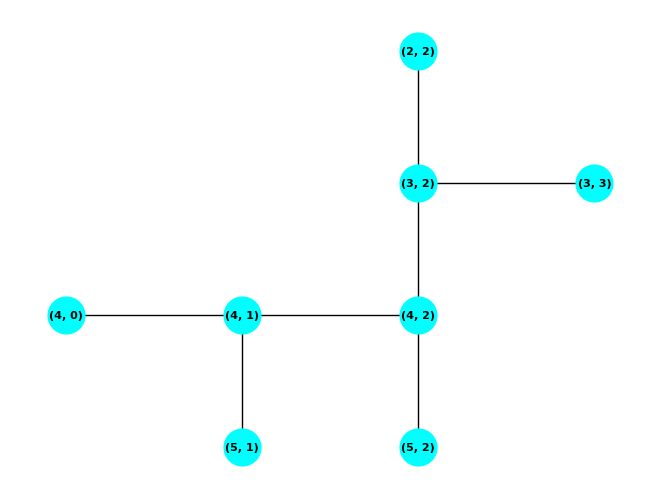

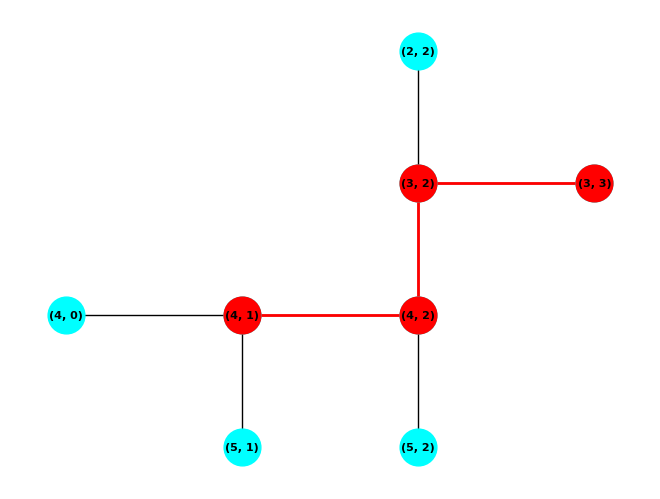

In [41]:
laPoderosa_A(laberintoCopia, agenteA)

## **Gif Sobre la ejecución de $A^{*}$ en el laberinto aleatorio**

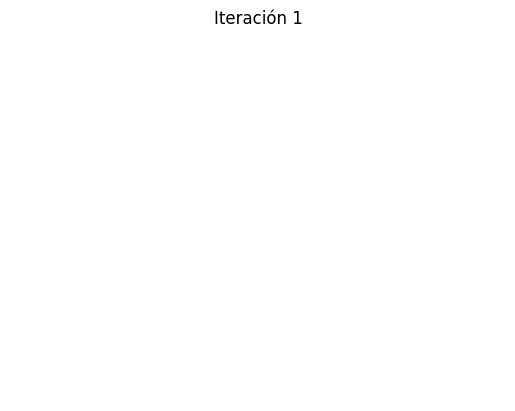

In [42]:
def update(frame):
    ax.clear()
    nx.draw(grafos[frame], pos, with_labels=True, node_size=700, node_color='cyan', font_size=8, font_weight='bold')
    plt.title(f'Iteración {frame+1}')

# Generar grafos y posición de nodos
grafos, ruta_mas_corta = laPoderosa_A_Animation(laberintoCopia, agenteA)
pos = {(fila, columna): (columna, -fila) for fila in range(len(laberintoCopia)) for columna in range(len(laberintoCopia[0]))}

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(grafos), interval=1000, repeat=True)

# Configurar el formato de renderizado predeterminado como HTML5
plt.rcParams['animation.html'] = 'html5'

# Visualizar la animación en el notebook
HTML(ani.to_jshtml())